# Exercice

1. Lire le dataset «fetch_lfw_people».fromsklearn.datasetsimportfetch_lfw_people

In [7]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from ExerciceFace import *

In [5]:
# Charger le dataset
min_person = 10
X, y, target_names, images = load_dataset(min_person)

2. Afficher quelques images comme suit la figure ci-contre

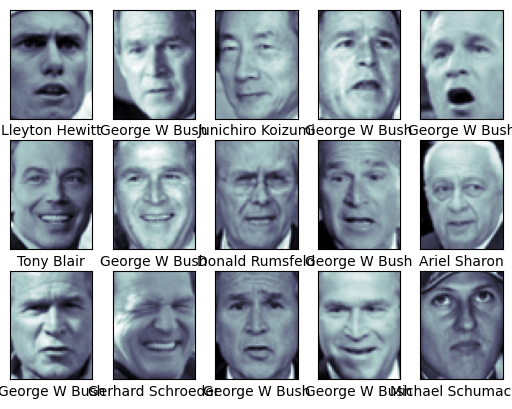

In [8]:
display_images(images, y, target_names)
plt.show()

3. Afficher le nombre d’images par personne sous forme d’histogramme.  Que constatez-vous ?

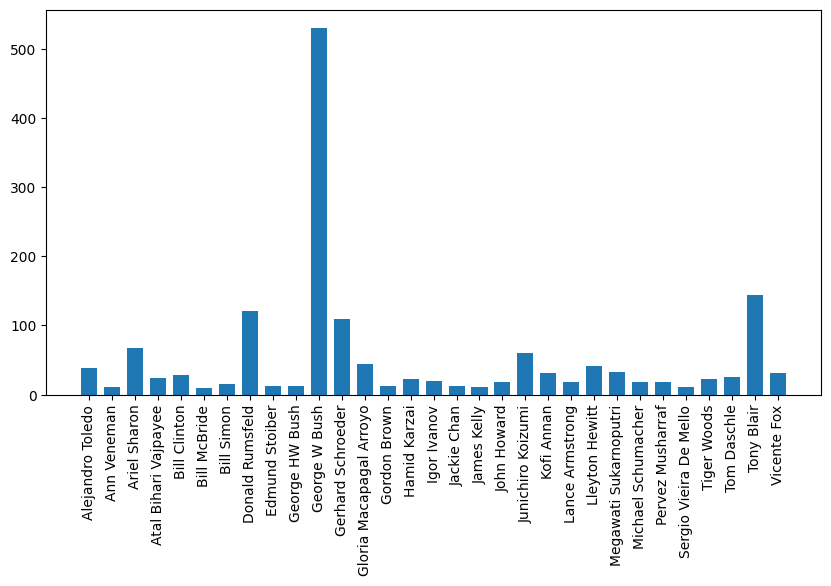

In [9]:
plot_histogram(y, target_names)
plt.show()

Ce que l'on remarque c'est que le nombre d'images par personne est très déséquilibré. Certaines personnes ont plus de 500 images alors que d'autres n'en ont que 10 ou 20. Cela peut poser problème pour l'apprentissage de notre modèle car il sera plus difficile de reconnaître les personnes qui ont peu d'images.

4. Appliquer PCA pour réduire la dimension des données.

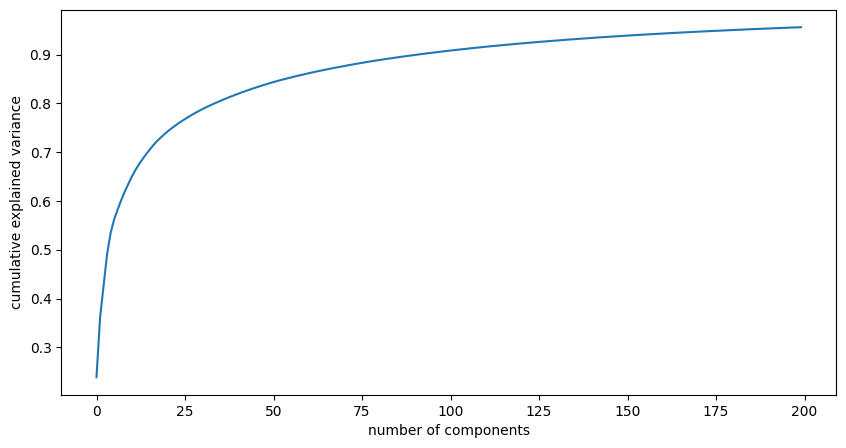

In [10]:
X_pca, pca = apply_pca(X, 200)
# affiche le cumul de la variance expliquée en fonction du nombre de composantes
plt.figure(figsize=(min_person, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

On ramarque que la dimension des données est très grande ce qui peut poser problème pour l'apprentissage de notre modèle. Nous allons donc appliquer PCA pour réduire la dimension des données. On peut la reduie a 50 composantes principales.

5. AppliquerPCA avec l’option whiten=True. Expliquer l’intérêt de cette option pour cette application

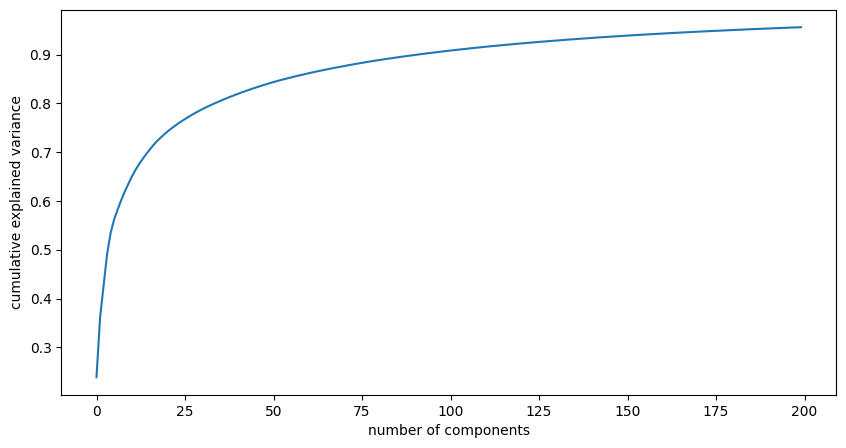

In [11]:
X_pca_whiten, pca_whiten = apply_pca_whiten(X, 200)
plt.figure(figsize=(min_person, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

L'interet de cette option est de normaliser les données. Cela permet de réduire les effets de l'éclairage et de la pose sur les images. Cela permet également de réduire les effets de la luminosité et du contraste sur les images.

6. On vous propose de rééquilibrer le jeu de données en se limitant à 50 images par personne. Écrire le code correspondant

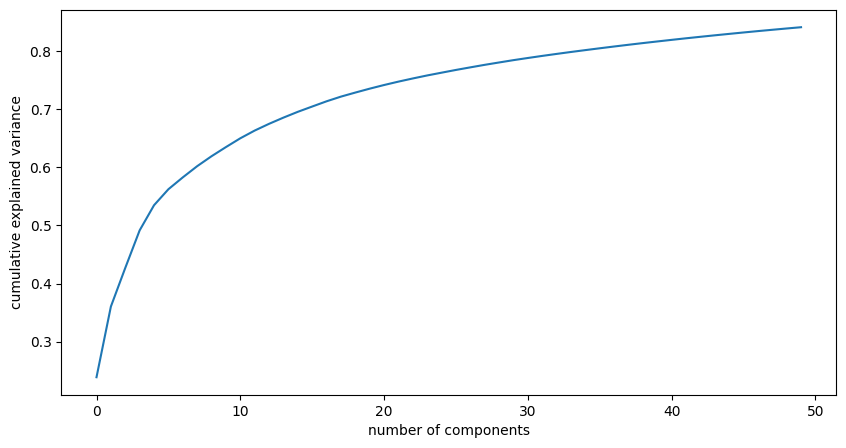

In [12]:
X_pca, pca = apply_pca(X, 50)
# affiche le cumul de la variance expliquée en fonction du nombre de composantes
plt.figure(figsize=(min_person, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

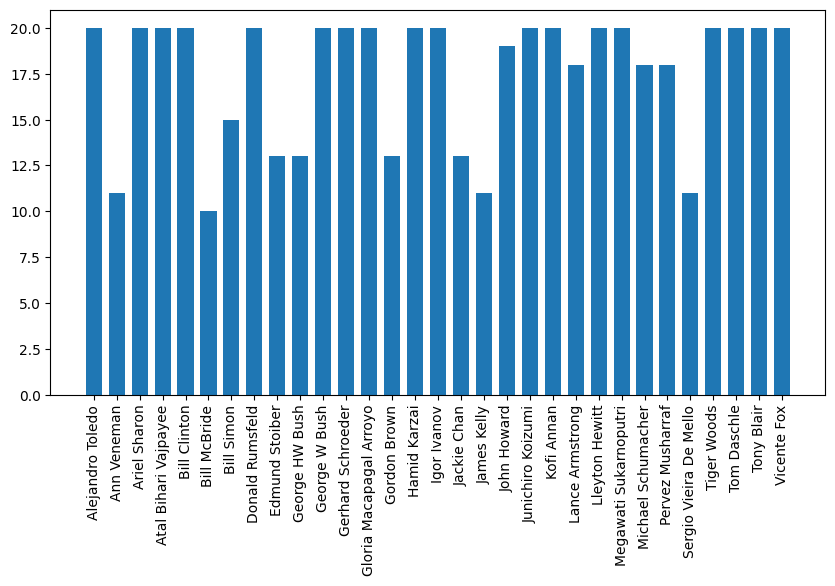

In [17]:
X_balanced, y_balanced = rebalance_dataset(X, y, target_names, 20)
plot_histogram(y_balanced, target_names)
plt.show()

7. Interpréter

Ce que l'on remarque c'est que le nombre d'images par personne est maintenant équilibré. Chaque personne a maintenant 10 images minimum. Cela permettra à notre modèle d'apprendre plus facilement à reconnaître les personnes.